# Bike sharing Regression Analysis
Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
# Reading the Dataset
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the number is nulls's in the dataset and there are none
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# There are 730 rows in the Dataset
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Extracting Year and Month from dteday
df['year'] = pd.to_datetime(df['dteday'],format="mixed",dayfirst=True).dt.year
df['month'] = pd.to_datetime(df['dteday'],format='mixed',dayfirst=True).dt.month


df = df.drop(['yr','mnth'],axis=1)

Data Analysis

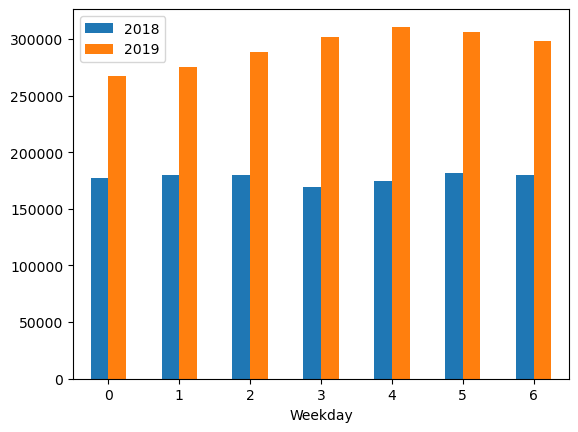

In [9]:
# Trend of Sales by Year and Weekday 
tempdf = pd.pivot_table(data=df,index=['weekday'],columns='year',values='cnt',aggfunc='sum')

tempdataframe = pd.DataFrame({'Weekday': tempdf.index,'2018':tempdf[2018],'2019':tempdf[2019]})
tempdataframe.plot(x="Weekday", y=["2018", "2019"], kind="bar", rot=0)
plt.show()

#### 2019 has seen more sales compared to 2018

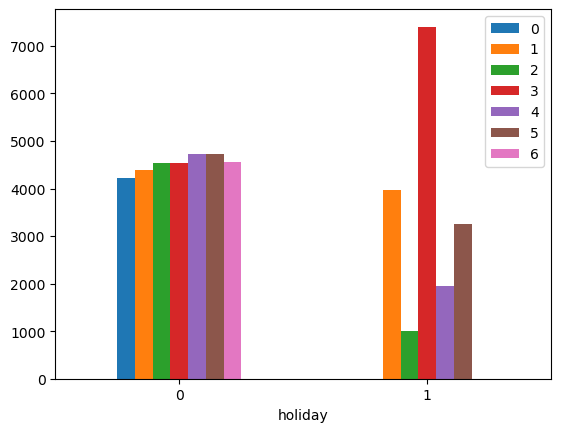

In [10]:
tempdf = pd.pivot_table(data=df,index=['holiday'],columns='weekday',values='cnt',aggfunc='mean')
tempdataframe = pd.DataFrame({'holiday': tempdf.index,'0':tempdf[0],'1':tempdf[1],'2':tempdf[2],'3':tempdf[3],'4':tempdf[4],'5':tempdf[5],'6':tempdf[6],})
tempdataframe.plot(x="holiday", y=["0", "1","2","3","4","5","6"], kind="bar", rot=0)
plt.show()

#### There is NO much impact on Sales on Holidays expect if it falls on Wednesday

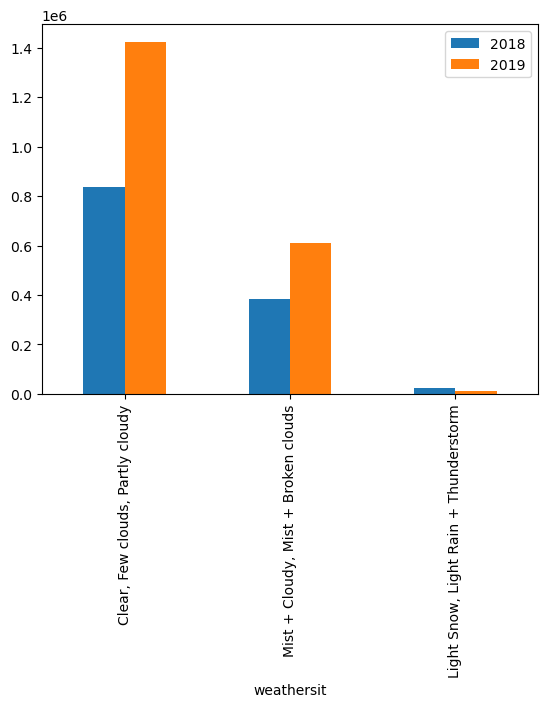

In [11]:
tempdf = pd.pivot_table(data=df,index=['weathersit'],columns='year',values='cnt',aggfunc='sum')

tempdataframe = pd.DataFrame({'weathersit': tempdf.index,'2018':tempdf[2018],'2019':tempdf[2019]})

tempdataframe['weathersit'] = tempdataframe['weathersit'].astype(str)

tempdataframe[['weathersit']] = tempdataframe[['weathersit']].apply(lambda x: x.map({'1':"Clear, Few clouds, Partly cloudy",'2':"Mist + Cloudy, Mist + Broken clouds",'3':'Light Snow, Light Rain + Thunderstorm'}))

tempdataframe.plot(x="weathersit", y=["2018", "2019"], kind="bar", rot=90)
plt.show()

####  Weather is playing a key role in the Bikes Rented. "Clear, Few clouds, Partly cloudy" are seeing the highest numbers. There is NO data for " Heavy Rain + Ice Pallets" which could mean no Bikes are taken these days

In [12]:
df['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [13]:
bins = [0,5, 10,15, 20, 25, 30, 36]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-36']
df['temp-binned'] = pd.cut(df['temp'], bins=bins, labels=labels)

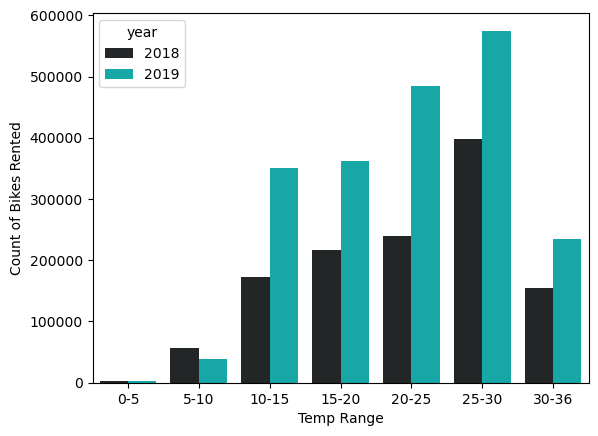

In [14]:
tempdataframe = df.groupby(['temp-binned','year'])['cnt'].sum().reset_index()
sns.barplot(tempdataframe,x='temp-binned',y='cnt',hue='year',color='c')
plt.xlabel("Temp Range")
plt.ylabel("Count of Bikes Rented")
plt.show()

#### Temperature is playing a major role on the count of bikes being rented. During days when temperature is between 20 and 30, the rentals are highest

In [15]:
df=df.drop('temp-binned',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  year        730 non-null    int32  
 15  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(9), object(1)
memory usage: 85.7+ KB


In [17]:
#dropping columns instant and  dteday 
#dteday: the month and year are already captured in other cols. Hence dteday makes no sense
#instantL
df = df.drop(['instant','dteday'],axis=1)

In [18]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


<Axes: xlabel='month', ylabel='cnt'>

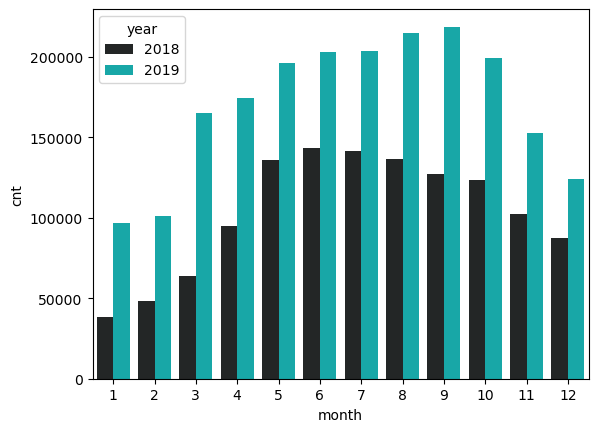

In [19]:
tempdataframe = df.groupby(['month','year'])['cnt'].sum().reset_index()
sns.barplot(tempdataframe,x='month',y='cnt',hue='year',color='c')

#### Months from May to October see high number of bike rentals

<Axes: xlabel='season', ylabel='cnt'>

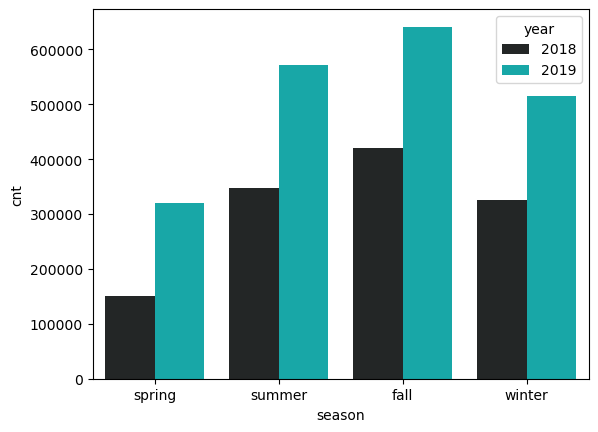

In [20]:
tempdataframe = df.groupby(['season','year'])['cnt'].sum().reset_index()
tempdataframe[['season']] = tempdataframe[['season']].apply(lambda x: x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
,
sns.barplot(tempdataframe,x='season',y='cnt',hue='year',color='c')

#### Fall and Summer see the highest Bike Rentals

In [21]:
# Dropping casual and registered as they are already contained in cnt. Cnt is also our target variable
df=df.drop(['casual','registered'],axis=1)

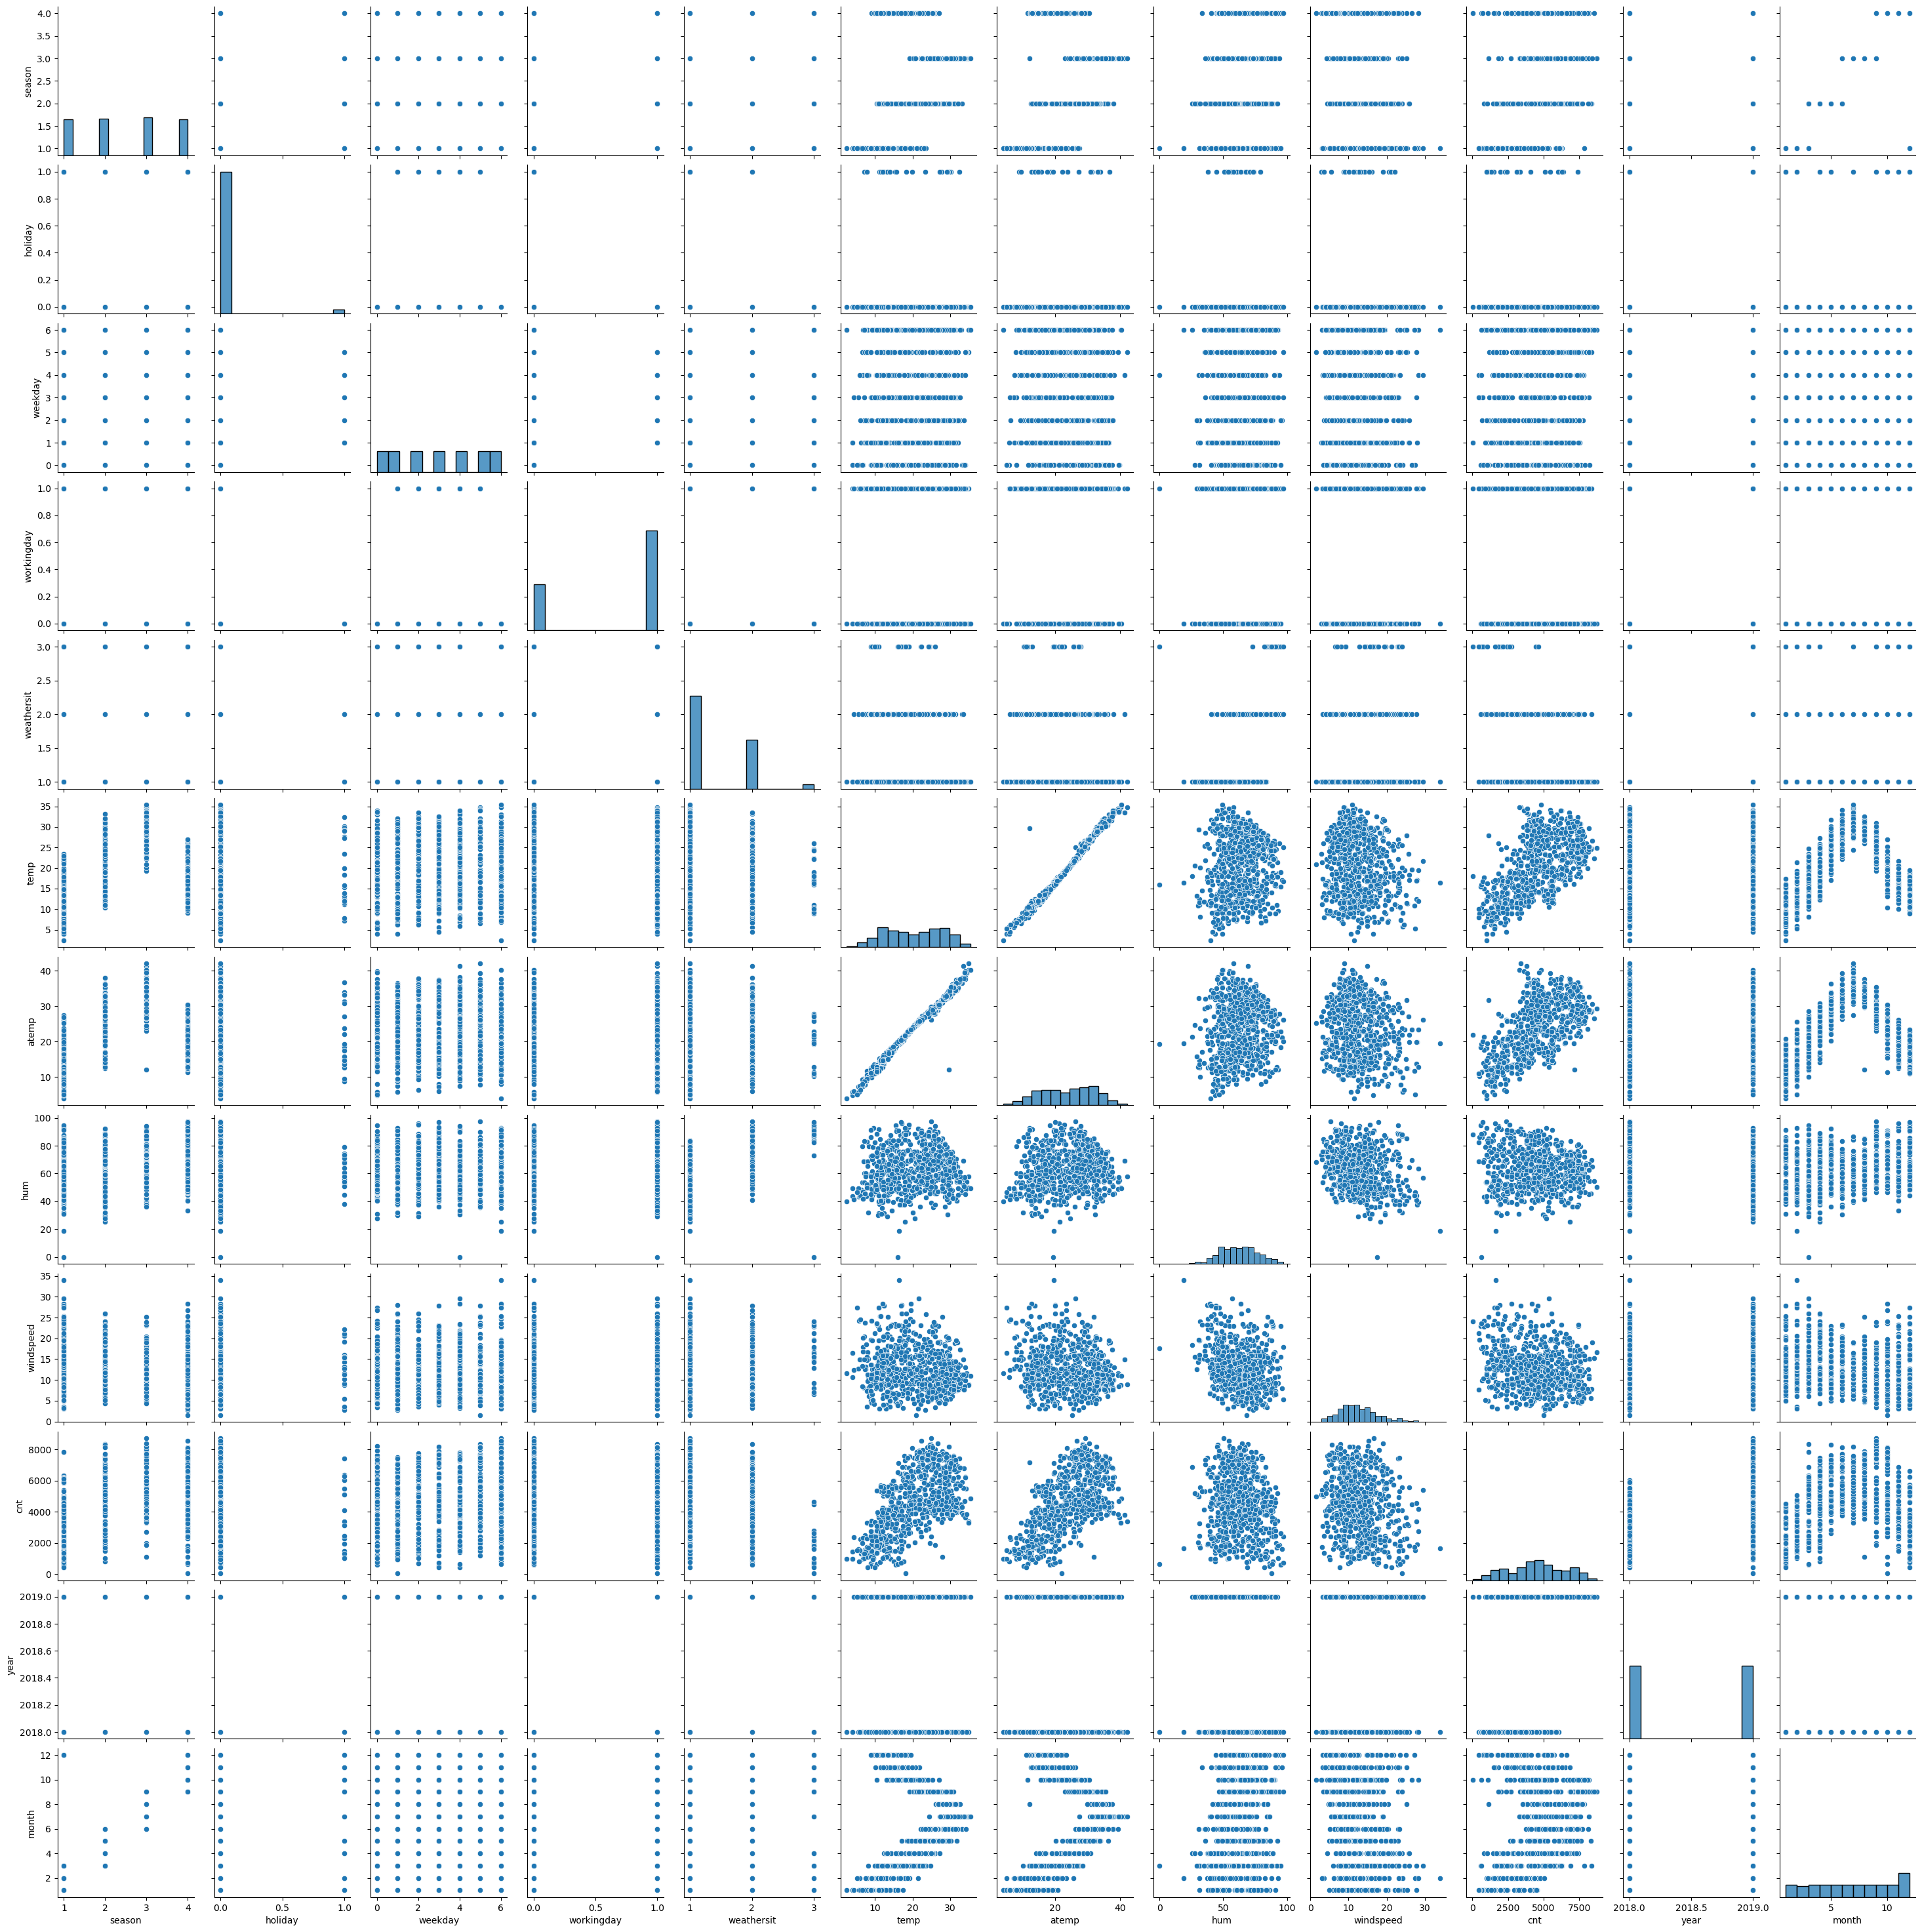

In [22]:
sns.pairplot(df)
plt.show()

<Axes: >

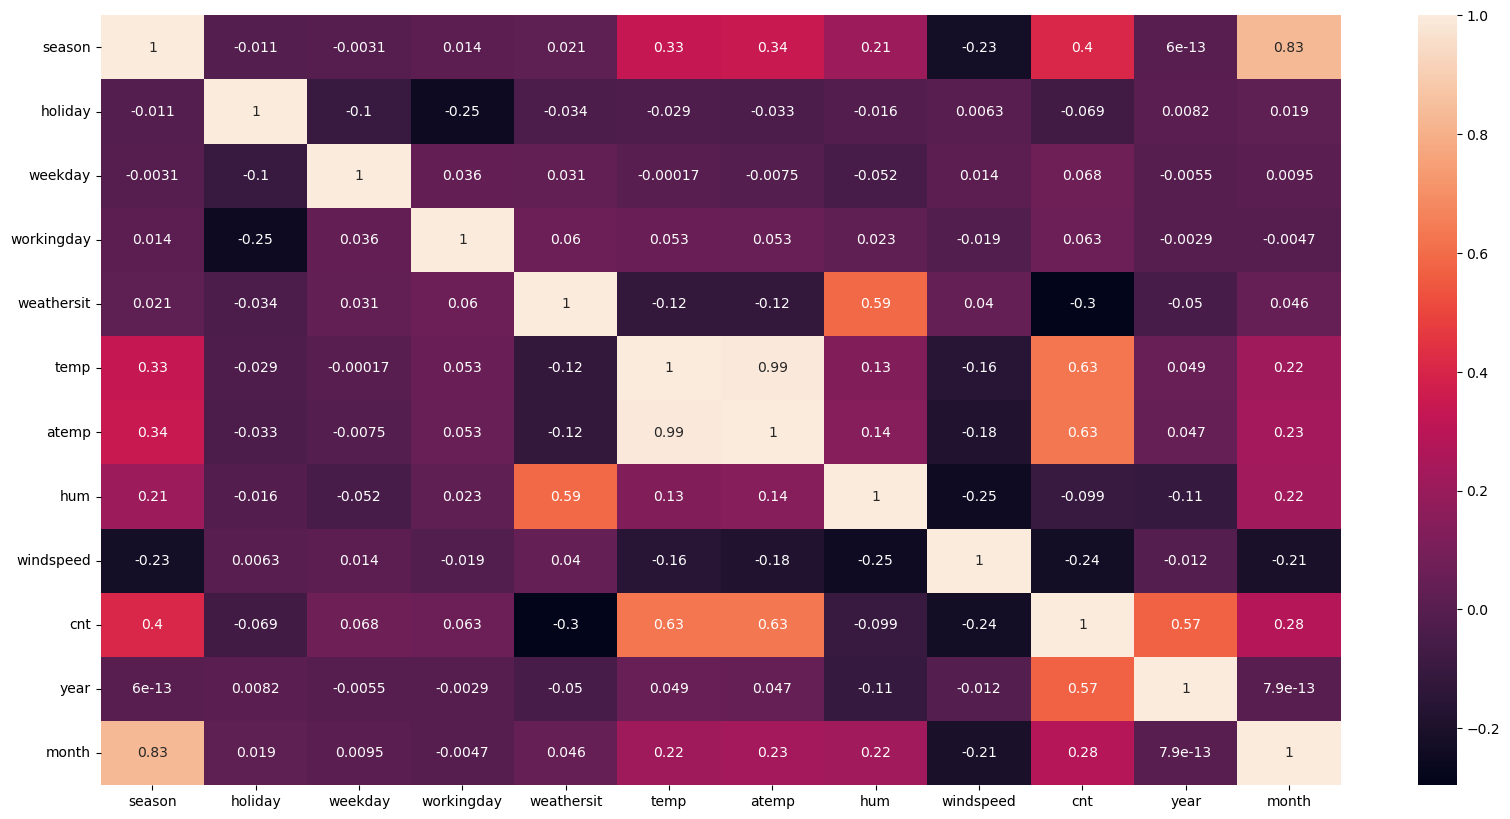

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

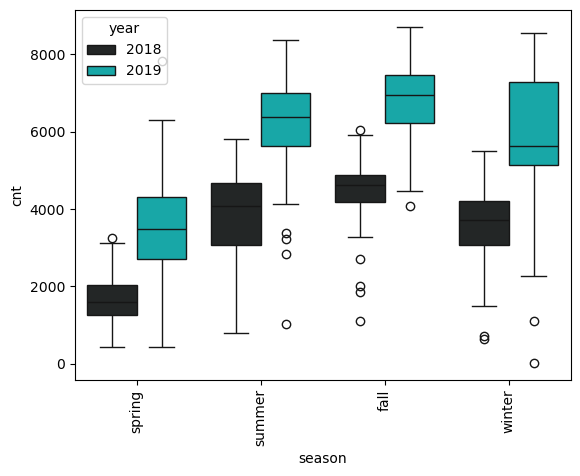

In [24]:
sns.boxplot(data=df,y='cnt',x='season',hue='year',color='c')


plt.xticks([0,1,2,3] ,['spring', 'summer', 'fall','winter'],rotation=90)

plt.show()

#### Summer and Fall see the highest bike rentals

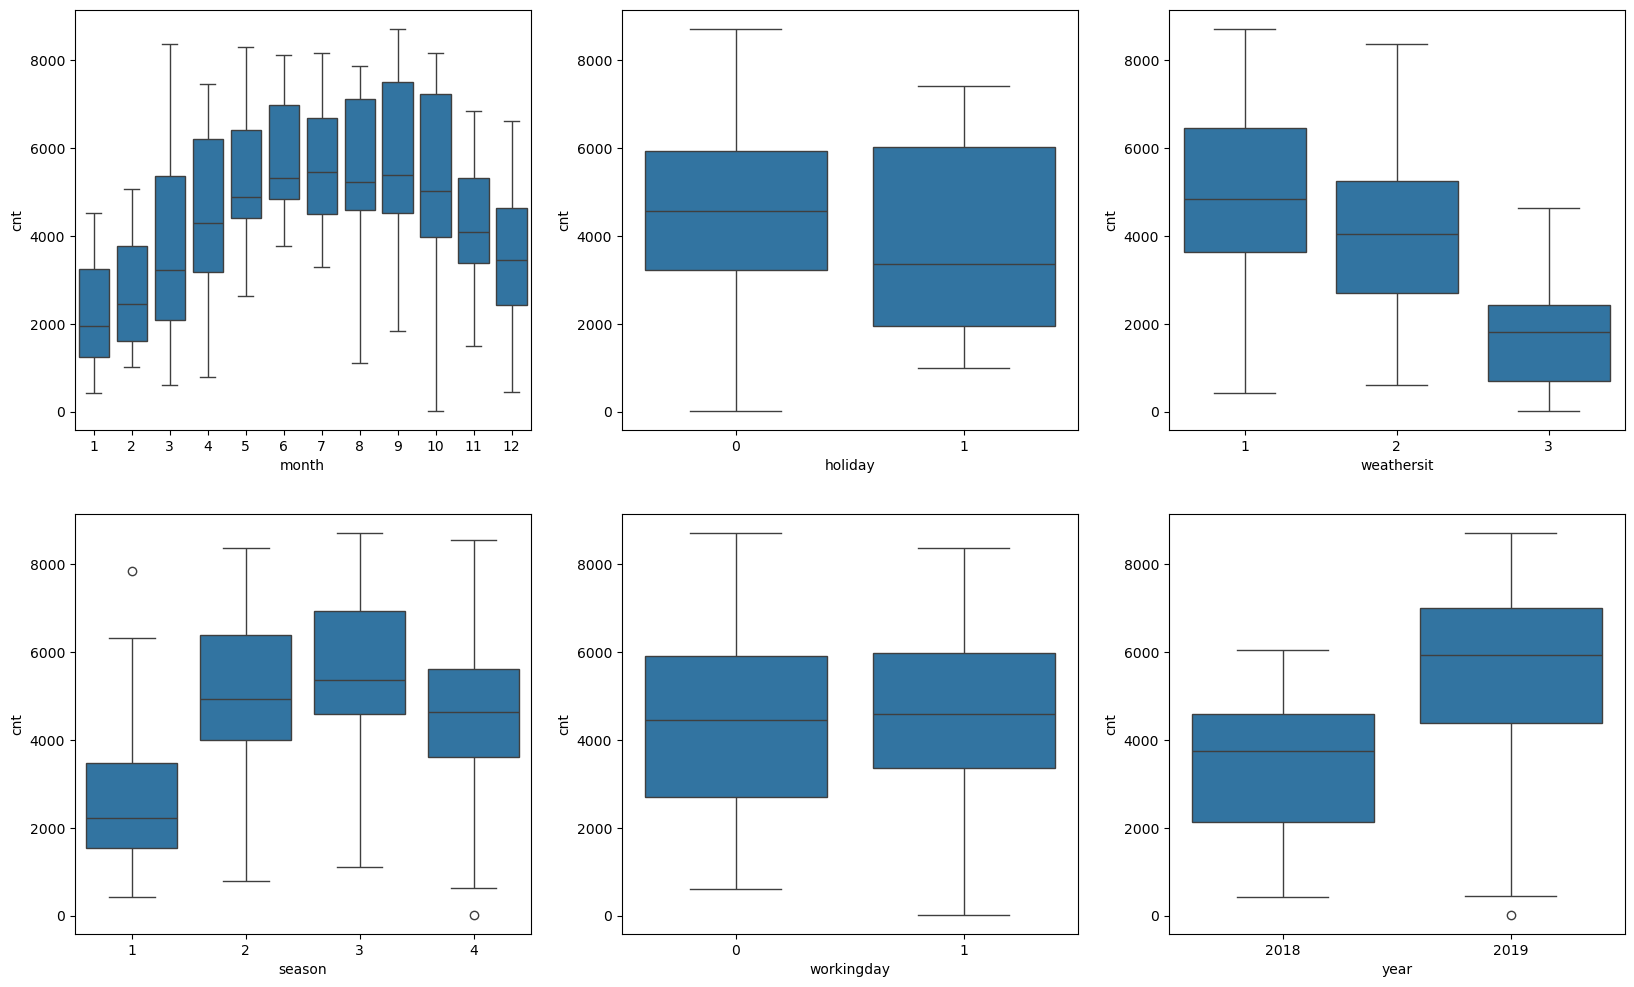

In [25]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='month',y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='year',y='cnt',data=df)
plt.show()

### Inferences
Months June to Sep see highest Bilke Rentals


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  year        730 non-null    int32  
 11  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(6)
memory usage: 62.9 KB


In [27]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [28]:
season = pd.get_dummies(df['season'],dtype=int,drop_first=True,prefix='season')
#mnth = pd.get_dummies(df['month'],dtype=int,drop_first=True,prefix='month')
#weekday = pd.get_dummies(df['weekday'],dtype=int,drop_first=True,prefix='weekday')
weathersit = pd.get_dummies(df['weathersit'],dtype=int,drop_first=True,prefix='weathersit')


In [29]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [30]:
#df = pd.concat([df,season,mnth,weekday,weathersit],axis=1)
#df=df.drop(['season','month','weekday','weathersit'],axis=1)

df = pd.concat([df,season,weathersit],axis=1)
df=df.drop(['season','weathersit'],axis=1)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       730 non-null    int64  
 1   weekday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   year          730 non-null    int32  
 9   month         730 non-null    int32  
 10  season_2      730 non-null    int32  
 11  season_3      730 non-null    int32  
 12  season_4      730 non-null    int32  
 13  weathersit_2  730 non-null    int32  
 14  weathersit_3  730 non-null    int32  
dtypes: float64(4), int32(7), int64(4)
memory usage: 65.7 KB


In [32]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=70)

In [33]:
df_test.shape

(220, 15)

In [34]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=70)

scaler = MinMaxScaler()
scaledvars = ['temp','atemp','hum','windspeed','cnt','year','month','weekday']
df_train[scaledvars] = scaler.fit_transform(df_train[scaledvars])

df_test[scaledvars] = scaler.transform(df_test[scaledvars])


In [35]:
df_test.head(5)

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,year,month,season_2,season_3,season_4,weathersit_2,weathersit_3
625,0,0.333333,1,0.703024,0.669562,0.897172,0.691023,0.466061,1.0,0.727273,0,1,0,1,0
572,0,0.833333,1,0.900316,0.902602,0.611396,0.269239,0.791763,1.0,0.545455,0,1,0,0,0
201,0,0.666667,1,0.941851,1.029563,0.710797,0.411546,0.432812,0.0,0.545455,0,1,0,1,0
148,0,0.000000,0,0.758058,0.739113,0.841902,0.394883,0.548320,0.0,0.363636,1,0,0,0,0
512,1,0.166667,0,0.814131,0.826942,0.695373,0.358977,0.692706,1.0,0.363636,1,0,0,0,0


In [36]:
X_train = df_train.drop('cnt',axis=1)
y_train= df_train['cnt']

 # Trainging the model with all varaibles and then eliminating


In [37]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const           0.165932
holiday        -0.048607
weekday         0.037455
workingday      0.022355
temp            0.340173
atemp           0.139730
hum            -0.121222
windspeed      -0.140073
year            0.226481
month          -0.029636
season_2        0.137487
season_3        0.108821
season_4        0.188758
weathersit_2   -0.057182
weathersit_3   -0.240292
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.01e-179
Time:                        07:10:51   Log-Likelihood:                 479.18
No. Observations:                 510   AIC:                            -928.4
Df Residuals:                     495   BIC:             

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,380.54
4,atemp,364.64
5,hum,16.94
8,month,10.19
10,season_3,7.12
11,season_4,5.17
6,windspeed,4.63
9,season_2,3.49
2,workingday,3.16
1,weekday,3.15


In [39]:
# As a first step, #Temp and #Atemp have very high correlection. Removing Temp (per heatmap it is 0.99)
X_train = X_train.drop('temp',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,20.29
4,hum,16.85
7,month,10.18
9,season_3,6.58
10,season_4,5.17
5,windspeed,4.47
8,season_2,3.41
1,weekday,3.15
2,workingday,3.15
11,weathersit_2,2.08


In [40]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const           0.162267
holiday        -0.045803
weekday         0.039171
workingday      0.023549
atemp           0.465232
hum            -0.122325
windspeed      -0.127541
year            0.227073
month          -0.028472
season_2        0.142847
season_3        0.123397
season_4        0.189160
weathersit_2   -0.057021
weathersit_3   -0.238661
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.00e-178
Time:                        07:10:51   Log-Likelihood:                 476.23
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     496   BIC:                            -865.2
Df 

In [41]:
# removing atemp as this is having highest P Value
X_train = X_train.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())



const           0.254977
holiday        -0.037247
weekday         0.033899
workingday      0.030511
hum            -0.033115
windspeed      -0.142826
year            0.241479
month          -0.021785
season_2        0.277138
season_3        0.337568
season_4        0.248511
weathersit_2   -0.081640
weathersit_3   -0.292676
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.37e-145
Time:                        07:10:51   Log-Likelihood:                 393.59
No. Observations:                 510   AIC:                            -761.2
Df Residuals:                     497   BIC:                            -706.1
Df Model:                   

### The R-squared value has decreased, which means the 'atemp' field cannot be removed. Dropping 'hum' given the very high VIF Value. 
Note: We have already confirmed we can drop 'temp'.

In [42]:

X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['hum','temp']



X_train = X_train.drop(dropping_cols,axis=1)



X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())




const           0.090797
holiday        -0.046942
weekday         0.043087
workingday      0.023289
atemp           0.448179
windspeed      -0.101997
year            0.229726
month          -0.035179
season_2        0.144463
season_3        0.128188
season_4        0.189188
weathersit_2   -0.077881
weathersit_3   -0.277240
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          7.82e-178
Time:                        07:10:51   Log-Likelihood:                 471.37
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     497   BIC:                            -861.7
Df Model:                   

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,15.40
6,month,9.66
8,season_3,6.24
9,season_4,5.16
4,windspeed,4.17
7,season_2,3.37
1,weekday,3.07
2,workingday,2.98
5,year,1.99
10,weathersit_2,1.48


# The R-squared value has decreased, which means the 'hum' field cannot be removed. Both atemp and hum are needed

In [44]:
# Only the 'temp' will be dropped



X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['temp']



X_train = X_train.drop(dropping_cols,axis=1)



X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())



const           0.162267
holiday        -0.045803
weekday         0.039171
workingday      0.023549
atemp           0.465232
hum            -0.122325
windspeed      -0.127541
year            0.227073
month          -0.028472
season_2        0.142847
season_3        0.123397
season_4        0.189160
weathersit_2   -0.057021
weathersit_3   -0.238661
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.00e-178
Time:                        07:10:51   Log-Likelihood:                 476.23
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     496   BIC:                            -865.2
Df 

In [45]:

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,20.29
4,hum,16.85
7,month,10.18
9,season_3,6.58
10,season_4,5.17
5,windspeed,4.47
8,season_2,3.41
1,weekday,3.15
2,workingday,3.15
11,weathersit_2,2.08


### Dropping 'month' and evaluating the model. Dropping 'month' given the high P Value
Note: We have already confirmed we can drop 'temp'.

In [46]:
X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['temp','month']



X_train = X_train.drop(dropping_cols,axis=1)



X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())


const           0.159285
holiday        -0.047883
weekday         0.038426
workingday      0.023903
atemp           0.464350
hum            -0.126953
windspeed      -0.127478
year            0.226920
season_2        0.139948
season_3        0.112950
season_4        0.170652
weathersit_2   -0.056712
weathersit_3   -0.238193
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.50e-179
Time:                        07:10:51   Log-Likelihood:                 475.45
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     497   BIC:                            -869.8
Df Model:                   

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,20.26
4,hum,16.00
8,season_3,5.61
5,windspeed,4.46
7,season_2,3.34
2,workingday,3.15
1,weekday,3.13
9,season_4,2.32
10,weathersit_2,2.08
6,year,1.99


# There is no major decrease in R2 Scores. All P Values and VIF Scores are in acceptable range.
['temp','month'] will be the two columns that will be dropped

# Residual Analysis

R2Score for Train : 0.8253669145744003


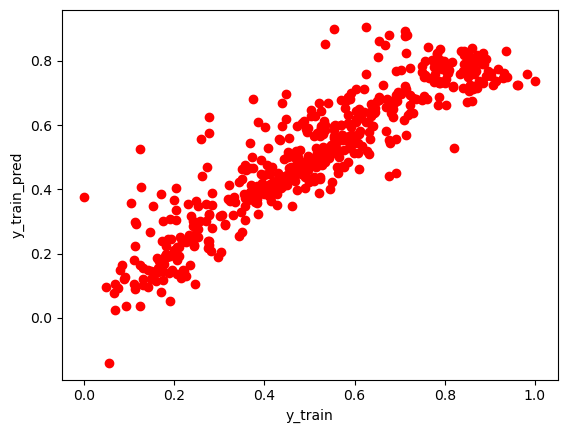

In [48]:
X_train = df_train.drop(['cnt'],axis=1)
y_train = df_train['cnt']

dropping_cols = ['temp','month'] 

X_train = X_train.drop(dropping_cols,axis=1)

X_train_sm = sm.add_constant(X_train)
y_train_pred = lrmodel.predict(X_train_sm)

print ("R2Score for Train : " + str(r2_score(y_train,y_train_pred)))
plt.scatter(y_train, y_train_pred,color='r')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

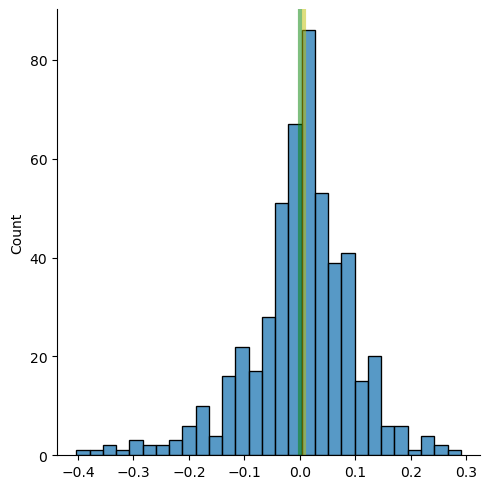

In [49]:
sns.displot(y_train-y_train_pred)
plt.axvline((y_train-y_train_pred).mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline((y_train-y_train_pred).median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.show()

### Mean of Residuals on Train Dataset is near Zero

# Predictions and Evaluations on the test set

R2Score for Test : 0.820367971943069


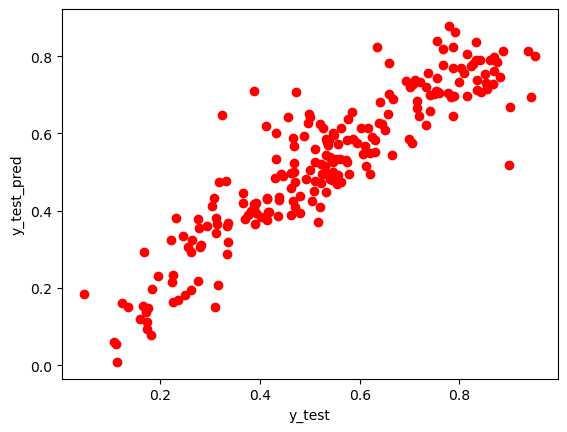

In [50]:
X_test = df_test.drop(['cnt'],axis=1)
y_test = df_test['cnt']


X_test = X_test.drop(dropping_cols,axis=1)

X_test_sm = sm.add_constant(X_test)
y_test_pred = lrmodel.predict(X_test_sm)

print ("R2Score for Test : " + str(r2_score(y_test,y_test_pred)))
plt.scatter(y_test, y_test_pred,color='r')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### The R2 Scores between and train and test are comparable

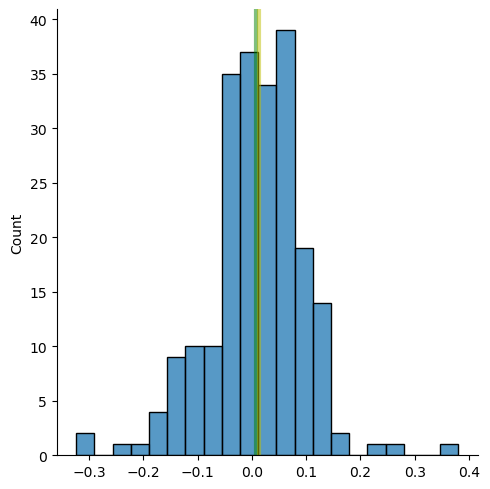

In [51]:
sns.displot(y_test-y_test_pred)
plt.axvline((y_test-y_test_pred).mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline((y_test-y_test_pred).median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.show()

### Mean of Residuals on Test Dataset is near Zero